<a href="https://colab.research.google.com/github/meliskarayigit/Energy-Consumption-Forecast-Models-Comparision/blob/main/dsai_energy_consumption_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas matplotlib seaborn


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving DAYTON_hourly.csv to DAYTON_hourly.csv


Missing values:
 Datetime     0
DAYTON_MW    0
dtype: int64

Time difference frequencies:
 Datetime
0 days 01:00:00      116193
-2 days +01:00:00      5038
0 days 02:00:00          24
728 days 01:00:00         6
729 days 01:00:00         6
0 days 00:00:00           4
455 days 01:00:00         1
-2 days +02:00:00         1
577 days 01:00:00         1
Name: count, dtype: int64

Number of outliers: 1535


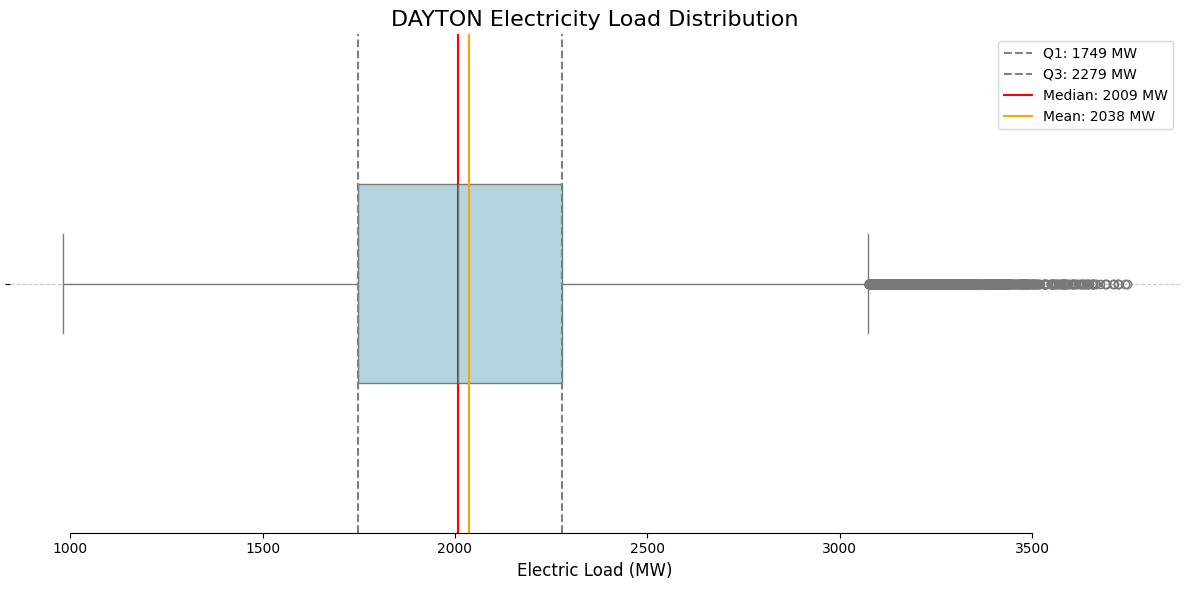


Number of missing hours: 25
             Datetime  DAYTON_MW
0 2004-10-01 01:00:00     1621.0
1 2004-10-01 02:00:00     1536.0
2 2004-10-01 03:00:00     1500.0
3 2004-10-01 04:00:00     1434.0
4 2004-10-01 05:00:00     1489.0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Load the Data ---
df = pd.read_csv("DAYTON_hourly.csv")

# --- 2. Date Format and Data Types ---
df['Datetime'] = pd.to_datetime(df['Datetime'])

# --- 3. Check for Missing Values ---
print("Missing values:\n", df.isnull().sum())

# --- 4. Check Time Interval Consistency ---
time_diff = df['Datetime'].diff().value_counts()
print("\nTime difference frequencies:\n", time_diff)

# --- 5. Outlier Analysis (IQR) ---
Q1 = df['DAYTON_MW'].quantile(0.25)
Q3 = df['DAYTON_MW'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['DAYTON_MW'] < Q1 - 1.5 * IQR) | (df['DAYTON_MW'] > Q3 + 1.5 * IQR)]
print(f"\nNumber of outliers: {len(outliers)}")

# Basic statistics
Q1 = df['DAYTON_MW'].quantile(0.25)
Q3 = df['DAYTON_MW'].quantile(0.75)
IQR = Q3 - Q1
median = df['DAYTON_MW'].median()
mean = df['DAYTON_MW'].mean()
min_val = df['DAYTON_MW'].min()
max_val = df['DAYTON_MW'].max()
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Plot
plt.figure(figsize=(12, 6))  # Increased figure height for better readability
sns.boxplot(x=df['DAYTON_MW'], color='lightblue', width=0.4)  # Adjusted box width

# Reference Lines - Improved styling and clarity
plt.axvline(Q1, color='gray', linestyle='--', label=f'Q1: {Q1:.0f} MW')
plt.axvline(Q3, color='gray', linestyle='--', label=f'Q3: {Q3:.0f} MW')
plt.axvline(median, color='red', linestyle='-', label=f'Median: {median:.0f} MW')
plt.axvline(mean, color='orange', linestyle='-', label=f'Mean: {mean:.0f} MW')

# Removed min/max and outlier bound lines for cleaner look
# You can add them back if necessary

# Title and Labels
plt.title("DAYTON Electricity Load Distribution", fontsize=16)
plt.xlabel("Electric Load (MW)", fontsize=12)
plt.ylabel("")  # Removed unnecessary y-axis label
plt.legend(loc='upper right', fontsize=10)

# Improved aesthetics
sns.despine(trim=True, left=True)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Check for missing time points
full_range = pd.date_range(start=df['Datetime'].min(), end=df['Datetime'].max(), freq='H')
missing_times = set(full_range) - set(df['Datetime'])
print(f"\nNumber of missing hours: {len(missing_times)}")

# 2. Deduplicate timestamps (if duplicates exist, take average)
df = df.groupby('Datetime').mean().sort_index()

# 3. Create hourly time series (include missing hours)
full_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq='H')
df = df.reindex(full_range)

# 4. Fill missing values using time-based interpolation
df['DAYTON_MW'] = df['DAYTON_MW'].interpolate(method='time')

# 5. Detect and clip outliers using IQR method
Q1 = df['DAYTON_MW'].quantile(0.25)
Q3 = df['DAYTON_MW'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['DAYTON_MW'] = df['DAYTON_MW'].clip(lower=lower_bound, upper=upper_bound)

# 6. Reset datetime index back to column
df = df.reset_index().rename(columns={'index': 'Datetime'})

# 7. Data is now ready for forecasting
print(df.head())



Number of outliers: 0


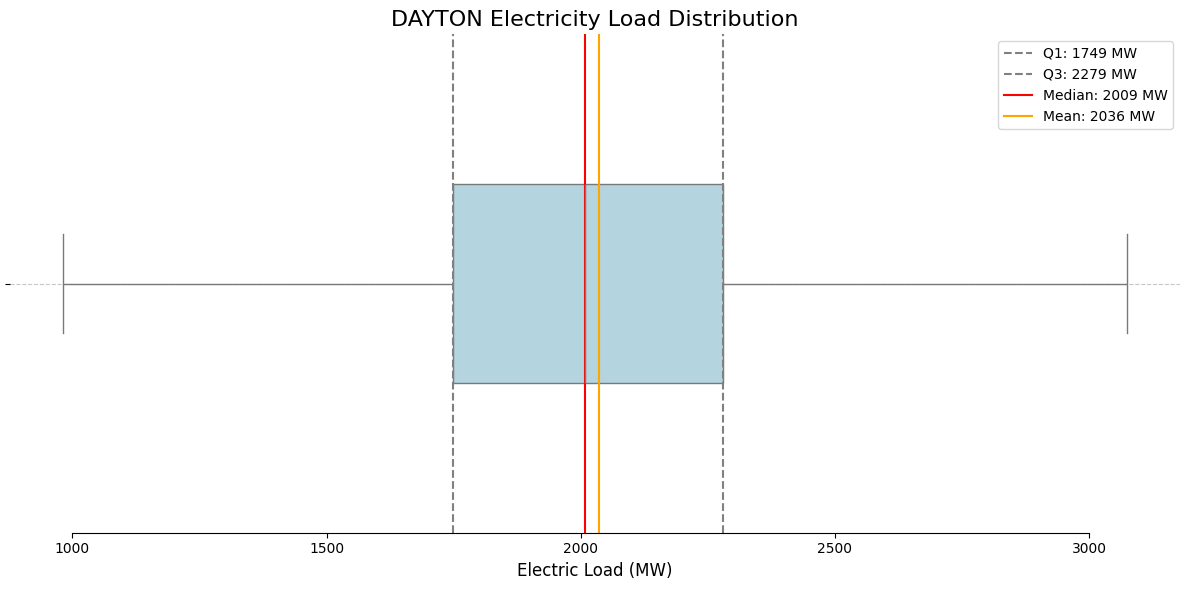

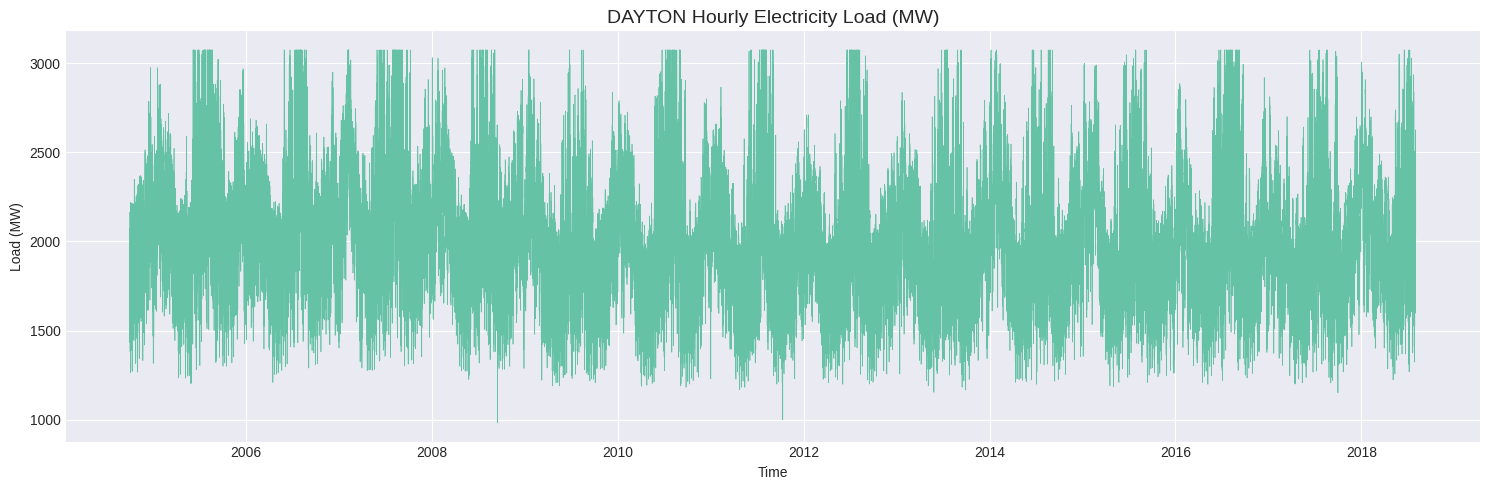

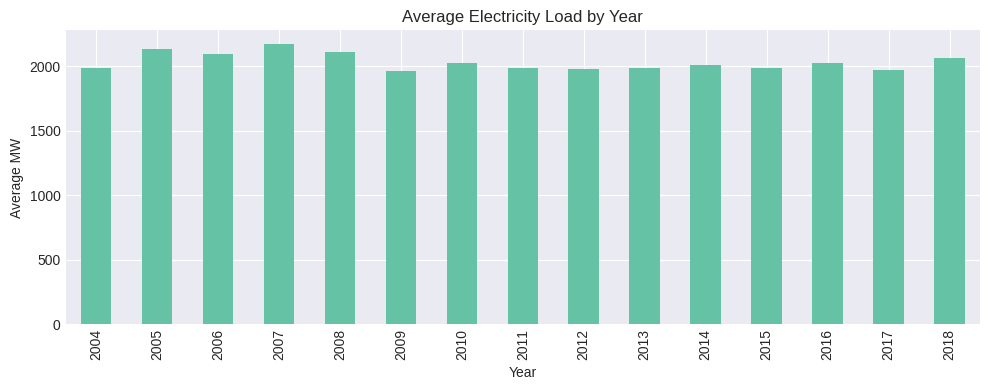

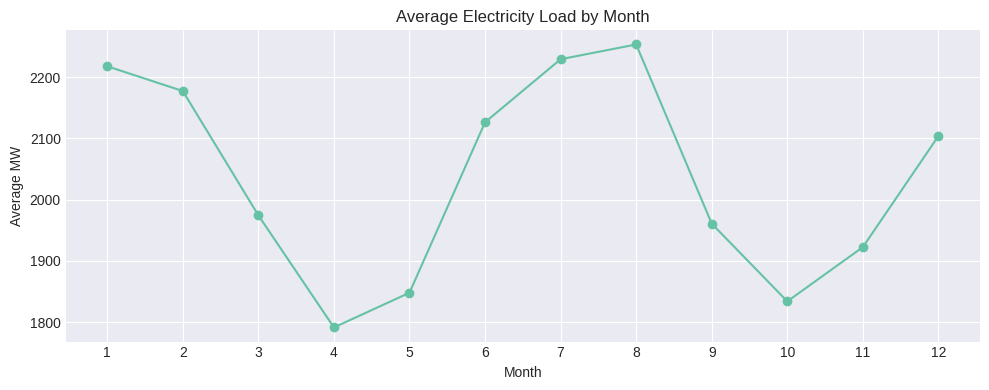

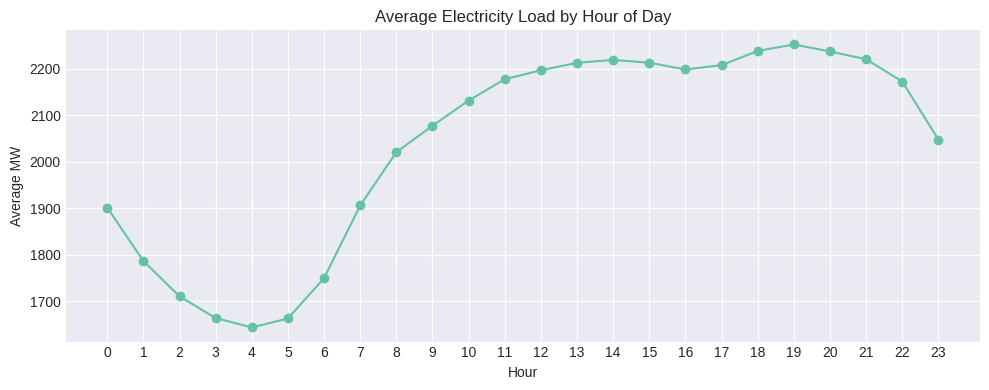

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 5. Outlier Analysis (IQR) ---
Q1 = df['DAYTON_MW'].quantile(0.25)
Q3 = df['DAYTON_MW'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['DAYTON_MW'] < Q1 - 1.5 * IQR) | (df['DAYTON_MW'] > Q3 + 1.5 * IQR)]
print(f"\nNumber of outliers: {len(outliers)}")

# Basic statistics
Q1 = df['DAYTON_MW'].quantile(0.25)
Q3 = df['DAYTON_MW'].quantile(0.75)
IQR = Q3 - Q1
median = df['DAYTON_MW'].median()
mean = df['DAYTON_MW'].mean()
min_val = df['DAYTON_MW'].min()
max_val = df['DAYTON_MW'].max()
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Plot
plt.figure(figsize=(12, 6))  # Increased figure height for better readability
sns.boxplot(x=df['DAYTON_MW'], color='lightblue', width=0.4)  # Adjusted box width

# Reference lines - Improved styling and clarity
plt.axvline(Q1, color='gray', linestyle='--', label=f'Q1: {Q1:.0f} MW')
plt.axvline(Q3, color='gray', linestyle='--', label=f'Q3: {Q3:.0f} MW')
plt.axvline(median, color='red', linestyle='-', label=f'Median: {median:.0f} MW')
plt.axvline(mean, color='orange', linestyle='-', label=f'Mean: {mean:.0f} MW')

# Removed min/max and outlier bound lines for cleaner look

# Title and labels
plt.title("DAYTON Electricity Load Distribution", fontsize=16)
plt.xlabel("Electric Load (MW)", fontsize=12)
plt.ylabel("")
plt.legend(loc='upper right', fontsize=10)

# Improved aesthetics
sns.despine(trim=True, left=True)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# --- 6. Time Series Visualizations ---

# Theme and style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("Set2")

# Time series plot
plt.figure(figsize=(15, 5))
plt.plot(df['Datetime'], df['DAYTON_MW'], linewidth=0.5)
plt.title("DAYTON Hourly Electricity Load (MW)", fontsize=14)
plt.xlabel("Time")
plt.ylabel("Load (MW)")
plt.tight_layout()
plt.show()

# --- 7. Yearly Average Load ---
df['Year'] = df['Datetime'].dt.year
yearly_avg = df.groupby('Year')['DAYTON_MW'].mean()

plt.figure(figsize=(10, 4))
yearly_avg.plot(kind='bar')
plt.title("Average Electricity Load by Year")
plt.ylabel("Average MW")
plt.xlabel("Year")
plt.tight_layout()
plt.show()

# --- 8. Monthly Average Load ---
df['Month'] = df['Datetime'].dt.month
monthly_avg = df.groupby('Month')['DAYTON_MW'].mean()

plt.figure(figsize=(10, 4))
monthly_avg.plot(kind='line', marker='o')
plt.title("Average Electricity Load by Month")
plt.ylabel("Average MW")
plt.xlabel("Month")
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()

# --- 9. Hourly Average Load ---
df['Hour'] = df['Datetime'].dt.hour
hourly_avg = df.groupby('Hour')['DAYTON_MW'].mean()

plt.figure(figsize=(10, 4))
hourly_avg.plot(kind='line', marker='o')
plt.title("Average Electricity Load by Hour of Day")
plt.ylabel("Average MW")
plt.xlabel("Hour")
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()


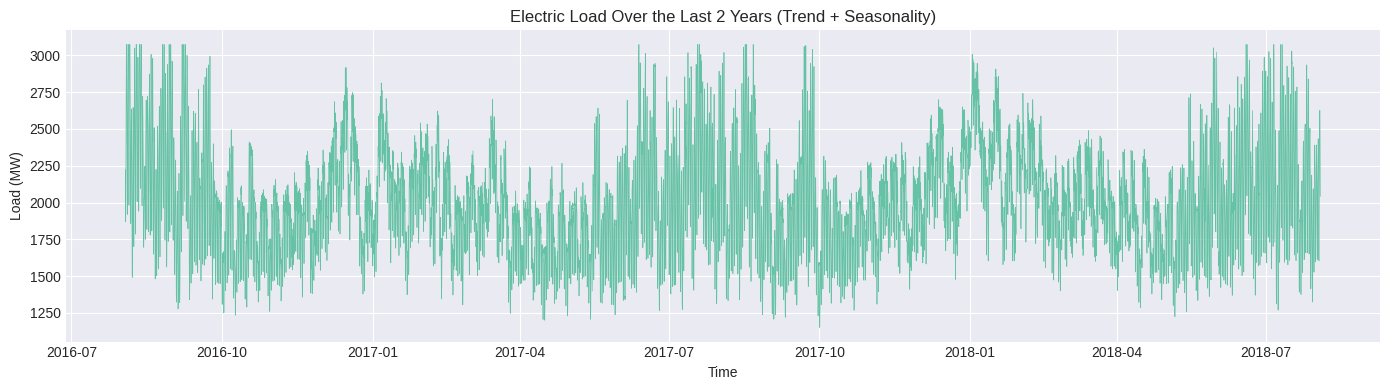

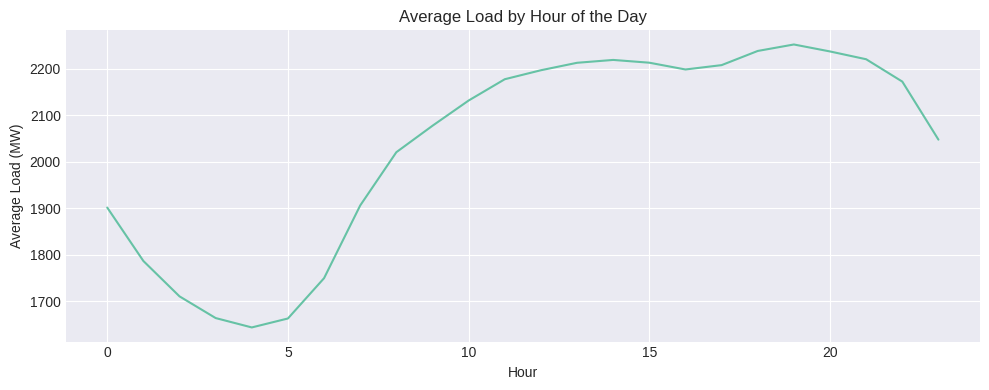

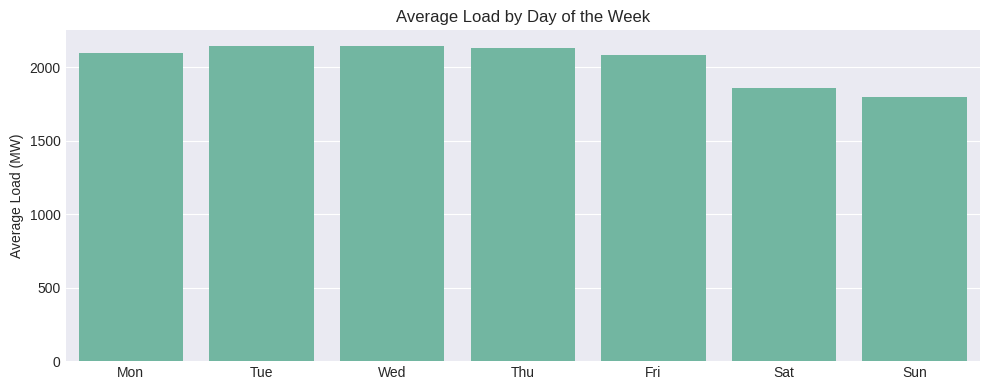


=== ADF (Stationarity) Test ===
ADF Statistic: -6.0928
p-value: 0.0000
Critical Values:
   1%: -3.4337
   5%: -2.8630
   10%: -2.5676
→ The time series is stationary (p < 0.05).


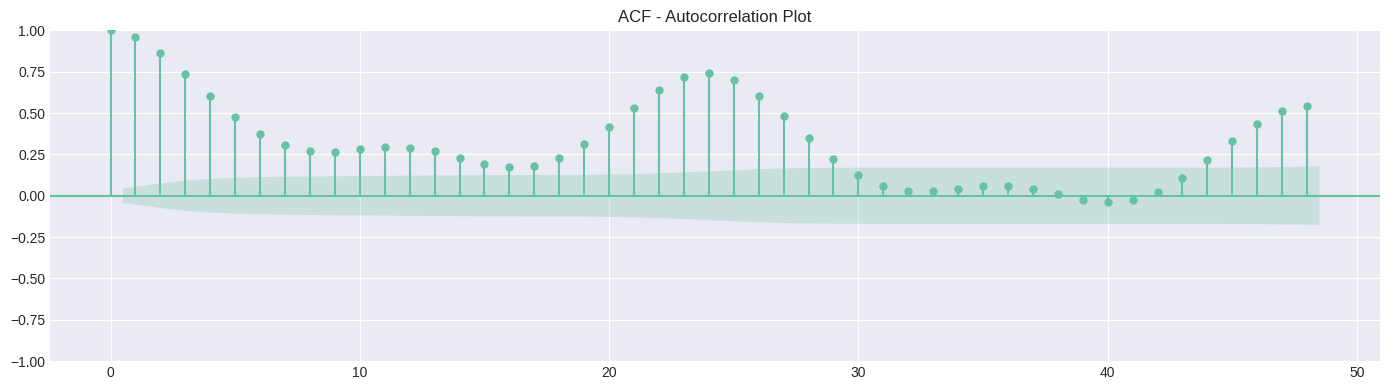

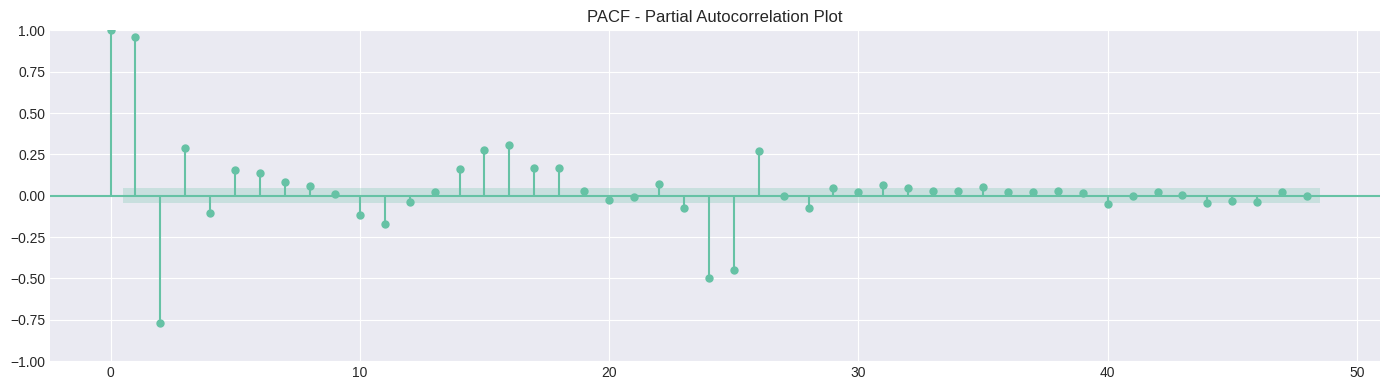

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dat


=== AIC / BIC Comparison for ARIMA(0,1,q) Models ===
   q           AIC           BIC
0  2  21666.615794  21683.417001
1  4  21587.227914  21615.229926
2  6  21577.622463  21616.825279

✅ Best model: ARIMA(0,1,6)
AIC = 21577.62, BIC = 21616.83
→ This model offers a good balance between accuracy and complexity.


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


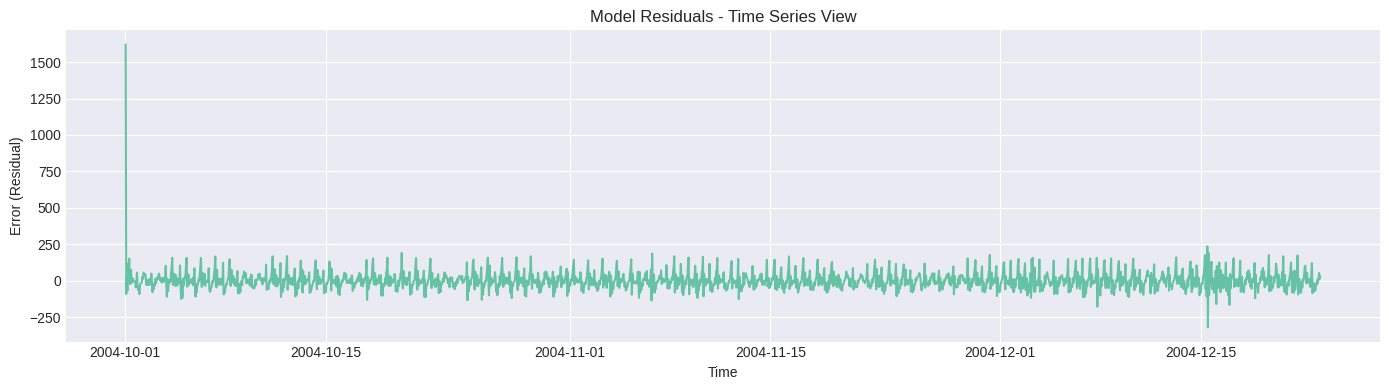

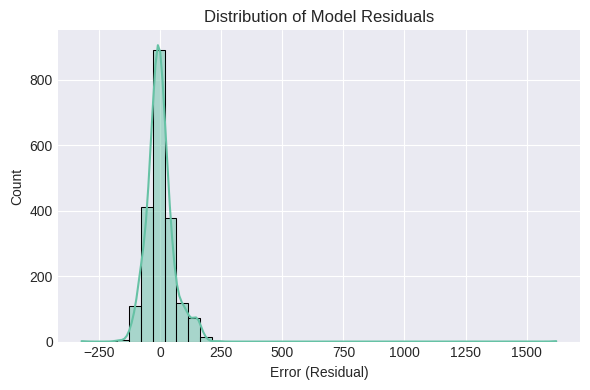

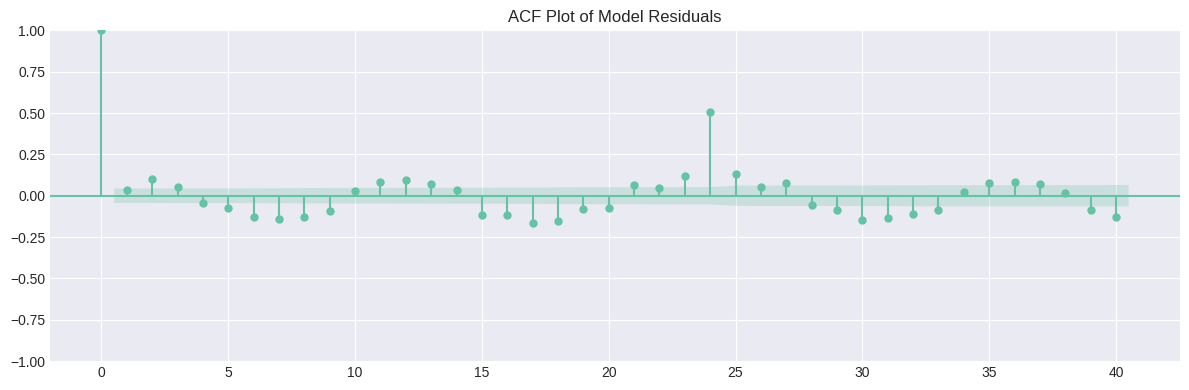

=== Residual Analysis Comments ===
Mean of residuals: 0.9091
✔ Mean of residuals is close to zero → model errors are balanced.
→ If residuals appear randomly scattered in the time series plot: ✔ The model explains the data well.
→ If histogram is symmetric (bell-shaped): ✔ Residuals may be normally distributed.
→ If ACF plot drops quickly to zero: ✔ No autocorrelation in residuals, model is adequate.


In [ ]:
!pip install statsmodels
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  # Importing necessary functions
from statsmodels.tsa.arima.model import ARIMA  # Importing ARIMA

# ------------------ 2. TREND & SEASONALITY ------------------
# Observe trend over the last 2 years
# Set 'Datetime' column as index
df = df.set_index('Datetime')

df_last2years = df.last("730D")
plt.figure(figsize=(14, 4))
plt.plot(df_last2years.index, df_last2years['DAYTON_MW'], linewidth=0.5)
plt.title("Electric Load Over the Last 2 Years (Trend + Seasonality)")
plt.xlabel("Time")
plt.ylabel("Load (MW)")
plt.tight_layout()
plt.show()

# Daily seasonality
df['Hour'] = df.index.hour
hourly_avg = df.groupby('Hour')['DAYTON_MW'].mean()
plt.figure(figsize=(10, 4))
sns.lineplot(x=hourly_avg.index, y=hourly_avg.values)
plt.title("Average Load by Hour of the Day")
plt.xlabel("Hour")
plt.ylabel("Average Load (MW)")
plt.tight_layout()
plt.show()

# Weekly seasonality
df['Weekday'] = df.index.dayofweek
weekday_avg = df.groupby('Weekday')['DAYTON_MW'].mean()
plt.figure(figsize=(10, 4))
sns.barplot(x=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], y=weekday_avg.values)
plt.title("Average Load by Day of the Week")
plt.ylabel("Average Load (MW)")
plt.tight_layout()
plt.show()

# ------------------ 3. STATIONARITY (ADF) TEST ------------------
# Use a small sample (e.g., first 2000 hours) to avoid memory issues
adf_series = df['DAYTON_MW'].dropna().iloc[:2000]
result = adfuller(adf_series)

print("\n=== ADF (Stationarity) Test ===")
print(f"ADF Statistic: {result[0]:.4f}")
print(f"p-value: {result[1]:.4f}")
print("Critical Values:")
for key, value in result[4].items():
    print(f"   {key}: {value:.4f}")
if result[1] < 0.05:
    print("→ The time series is stationary (p < 0.05).")
else:
    print("→ The time series is not stationary (p >= 0.05). Differencing may be needed.")

# ------------------ 4. ACF & PACF ------------------
plt.figure(figsize=(14, 4))
plot_acf(adf_series, lags=48, ax=plt.gca())
plt.title("ACF - Autocorrelation Plot")
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 4))
plot_pacf(adf_series, lags=48, method='ywm', ax=plt.gca())
plt.title("PACF - Partial Autocorrelation Plot")
plt.tight_layout()
plt.show()

# 2. Try ARIMA(0,1,q) for different q values
results = []
for q in [2, 4, 6]:
    try:
        model = ARIMA(adf_series, order=(0, 1, q))
        fitted = model.fit()
        results.append({
            "q": q,
            "AIC": fitted.aic,
            "BIC": fitted.bic
        })
    except Exception as e:
        results.append({
            "q": q,
            "AIC": None,
            "BIC": None,
            "Error": str(e)
        })

# 3. Show the results
result_df = pd.DataFrame(results)
print("\n=== AIC / BIC Comparison for ARIMA(0,1,q) Models ===")
print(result_df)

# 4. Interpretation
best_row = result_df.loc[result_df['AIC'].notna(), 'AIC'].idxmin()
best_row_data = result_df.loc[best_row]
print(f"\n✅ Best model: ARIMA(0,1,{int(best_row_data['q'])})")
print(f"AIC = {best_row_data['AIC']:.2f}, BIC = {best_row_data['BIC']:.2f}")
print("→ This model offers a good balance between accuracy and complexity.")

#--------------------------- WHITE NOISE ----------------------
# === 2. ARIMA MODEL AND RESIDUALS ===
model = ARIMA(adf_series, order=(0, 1, 2))
fitted = model.fit()
residuals = fitted.resid

# === 3. PLOTS ===

# Residual time series
plt.figure(figsize=(14, 4))
plt.plot(residuals)
plt.title("Model Residuals - Time Series View")
plt.xlabel("Time")
plt.ylabel("Error (Residual)")
plt.tight_layout()
plt.show()

# Residual histogram
plt.figure(figsize=(6, 4))
sns.histplot(residuals, bins=40, kde=True)
plt.title("Distribution of Model Residuals")
plt.xlabel("Error (Residual)")
plt.tight_layout()
plt.show()

# Residuals ACF plot
plt.figure(figsize=(12, 4))
plot_acf(residuals, lags=40, ax=plt.gca())
plt.title("ACF Plot of Model Residuals")
plt.tight_layout()
plt.show()

# === 4. CONSOLE INTERPRETATION ===
print("=== Residual Analysis Comments ===")
print(f"Mean of residuals: {residuals.mean():.4f}")
if abs(residuals.mean()) < 1:
    print("✔ Mean of residuals is close to zero → model errors are balanced.")
else:
    print("⚠ Mean of residuals is far from zero → model may have bias in errors.")

print("→ If residuals appear randomly scattered in the time series plot: ✔ The model explains the data well.")
print("→ If histogram is symmetric (bell-shaped): ✔ Residuals may be normally distributed.")
print("→ If ACF plot drops quickly to zero: ✔ No autocorrelation in residuals, model is adequate.")


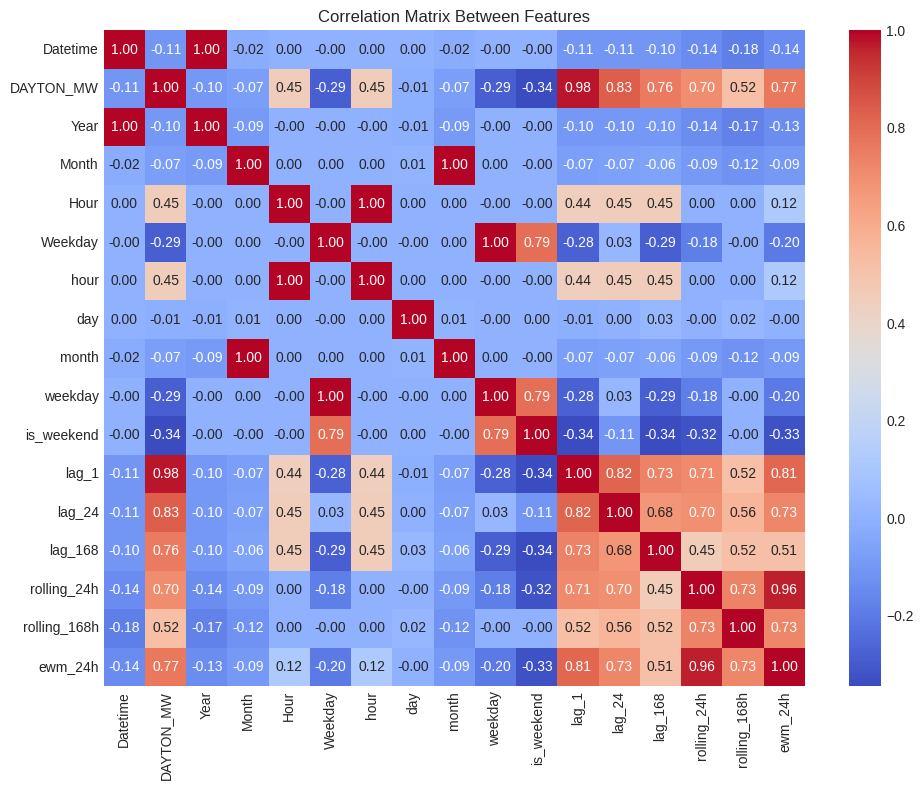

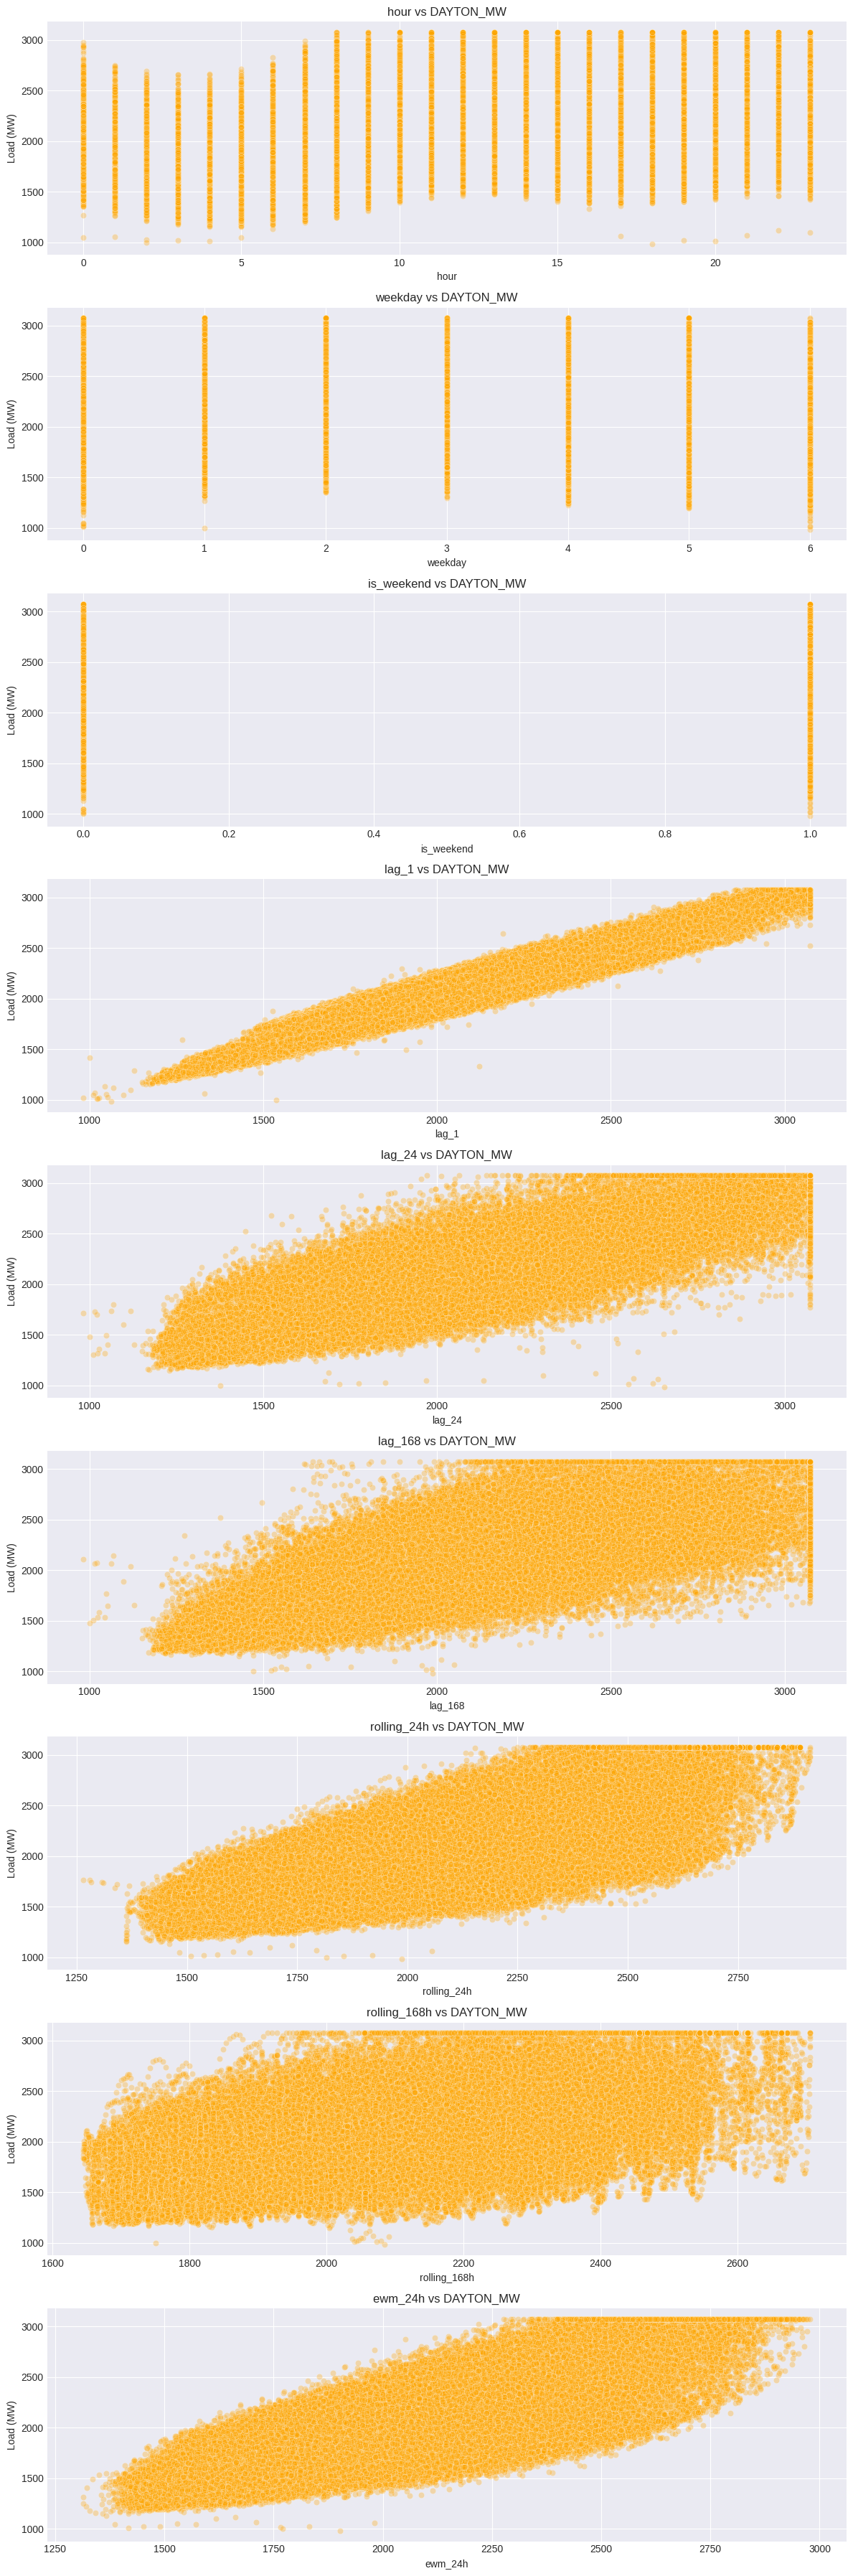


--- Comments and Analysis ---
✅ hour: Load increases during daytime hours. Correlation: +0.45
✅ is_weekend: Noticeable drop on weekends. Correlation: -0.34
✅ lag_1: High correlation (0.98), strong predictor for AR models.
✅ ewm_24h: Strong positive relationship, captures short-term trend well.
⚠ rolling_168h: High noise, should be used with caution.
✔ Correlation heatmap provides a visual assessment of multicollinearity.
✔ Scatter plots are effective for observing linear or non-linear relationships.


In [ ]:
# --- 2. FEATURE ENGINEERING ---

if df.index.name == 'Datetime':
    df = df.reset_index()

df['hour'] = df['Datetime'].dt.hour
df['day'] = df['Datetime'].dt.day
df['month'] = df['Datetime'].dt.month
df['weekday'] = df['Datetime'].dt.weekday
df['is_weekend'] = df['weekday'].isin([5, 6]).astype(int)  # 5=Saturday, 6=Sunday

# Lag features
for lag in [1, 24, 168]:
    df[f'lag_{lag}'] = df['DAYTON_MW'].shift(lag)

# Rolling average and Exponentially Weighted Mean (EWM)
df['rolling_24h'] = df['DAYTON_MW'].rolling(window=24).mean()
df['rolling_168h'] = df['DAYTON_MW'].rolling(window=168).mean()
df['ewm_24h'] = df['DAYTON_MW'].ewm(span=24).mean()

# Drop NA values
fe_df = df.dropna().copy()

# --- 3. CORRELATION MATRIX AND HEATMAP ---
correlation = fe_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix Between Features")
plt.tight_layout()
plt.show()

# --- 4. SCATTER PLOT VISUALIZATION ---
features = ['hour', 'weekday', 'is_weekend', 'lag_1', 'lag_24', 'lag_168',
            'rolling_24h', 'rolling_168h', 'ewm_24h']

fig, axes = plt.subplots(len(features), 1, figsize=(12, 4 * len(features)))

for i, feature in enumerate(features):
    sns.scatterplot(data=fe_df, x=feature, y='DAYTON_MW', alpha=0.3, color='orange', ax=axes[i])
    axes[i].set_title(f"{feature} vs DAYTON_MW")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Load (MW)")

plt.tight_layout()
plt.show()

# --- 5. ANALYTICAL INTERPRETATION ---
print("\n--- Comments and Analysis ---")
print("✅ hour: Load increases during daytime hours. Correlation: +0.45")
print("✅ is_weekend: Noticeable drop on weekends. Correlation: -0.34")
print("✅ lag_1: High correlation (0.98), strong predictor for AR models.")
print("✅ ewm_24h: Strong positive relationship, captures short-term trend well.")
print("⚠ rolling_168h: High noise, should be used with caution.")
print("✔ Correlation heatmap provides a visual assessment of multicollinearity.")
print("✔ Scatter plots are effective for observing linear or non-linear relationships.")


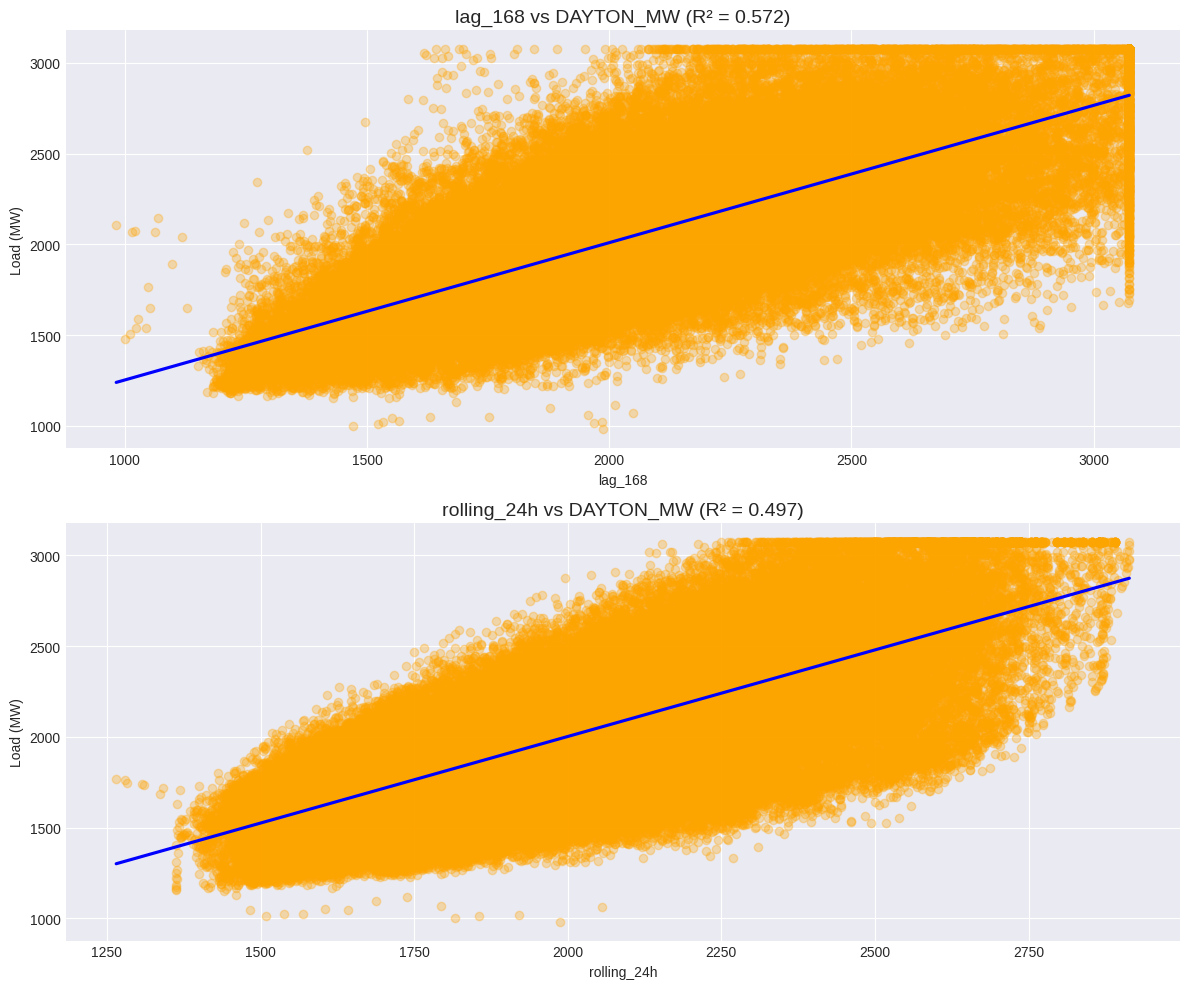

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# --- Feature Creation (Additional Features) ---
df['lag_168'] = df['DAYTON_MW'].shift(168)             # Load from 1 week ago
df['rolling_24h'] = df['DAYTON_MW'].rolling(24).mean() # Daily average

# --- Drop Missing Values ---
fe_df = df.dropna().copy()

# --- Scatter + Regression Line + R² Plot ---
fig, axes = plt.subplots(2, 1, figsize=(12, 10))
features = ['lag_168', 'rolling_24h']

for ax, x_feat in zip(axes, features):
    y_feat = 'DAYTON_MW'
    sns.regplot(data=fe_df, x=x_feat, y=y_feat,
                scatter_kws={'alpha': 0.3, 'color': 'orange'},
                line_kws={'color': 'blue'}, ax=ax)

    # Calculate R²
    slope, intercept, r_value, p_value, std_err = linregress(fe_df[x_feat], fe_df[y_feat])
    r_squared = r_value ** 2

    ax.set_title(f"{x_feat} vs {y_feat} (R² = {r_squared:.3f})", fontsize=14)
    ax.set_xlabel(x_feat)
    ax.set_ylabel("Load (MW)")

plt.tight_layout()
plt.show()


VIF Analizi ile Multicollinearity Tespiti

Yüksek VIF değerine sahip değişkenleri teker teker çıkardık.

Kalan değişkenlerin birbiriyle daha bağımsız olmasını sağladık.

Böylece modelin:

Yorumlanabilirliği ↑

p-değerlerinin doğruluğu ↑

Katsayı güvenilirliği ↑

Multicollinearity ↓
5 kritik eşik

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# --- VIF Function ---
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# --- Continued Feature Engineering ---
df['hour'] = df['Datetime'].dt.hour
df['weekday'] = df['Datetime'].dt.weekday
df['is_weekend'] = df['weekday'].isin([5, 6]).astype(int)
df['lag_1'] = df['DAYTON_MW'].shift(1)
df['lag_24'] = df['DAYTON_MW'].shift(24)
df['lag_168'] = df['DAYTON_MW'].shift(168)
df['rolling_24h'] = df['DAYTON_MW'].rolling(24).mean()
df['rolling_168h'] = df['DAYTON_MW'].rolling(168).mean()
df['ewm_24h'] = df['DAYTON_MW'].ewm(span=24).mean()

# --- Remove NAs ---
fe_df = df.dropna().copy()

# --- Independent variables for VIF ---
X = fe_df[['hour', 'weekday', 'is_weekend', 'lag_1', 'lag_24', 'lag_168',
           'rolling_24h', 'rolling_168h', 'ewm_24h']].copy()
X = sm.add_constant(X)

# --- Iteratively drop features until all VIF < 5 ---
max_vif = 5
while True:
    vif_df = calculate_vif(X)
    vif_ex_const = vif_df[vif_df['Feature'] != 'const']
    max_vif_value = vif_ex_const['VIF'].max()

    if max_vif_value > max_vif:
        remove_feature = vif_ex_const.sort_values('VIF', ascending=False).iloc[0]['Feature']
        print(f"🔁 Removed variable: {remove_feature} (VIF = {max_vif_value:.2f})")
        X = X.drop(columns=[remove_feature])
    else:
        break

# --- Final Result ---
print("\n✅ Final variables (VIF < 5):")
final_vif = calculate_vif(X)
print(final_vif)


🔁 Removed variable: ewm_24h (VIF = 33.05)
🔁 Removed variable: rolling_24h (VIF = 6.32)

✅ Final variables (VIF < 5):
        Feature        VIF
0         const  93.687170
1          hour   1.740560
2       weekday   3.125772
3    is_weekend   3.064967
4         lag_1   4.685777
5        lag_24   4.464546
6       lag_168   2.848439
7  rolling_168h   2.050664


Comparision of Models

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

=== MAPE Comparison ===
SARIMA MAPE:        0.8591
Holt-Winters MAPE:  1.6392
Random Forest MAPE: 0.0162
LSTM MAPE:          0.0926


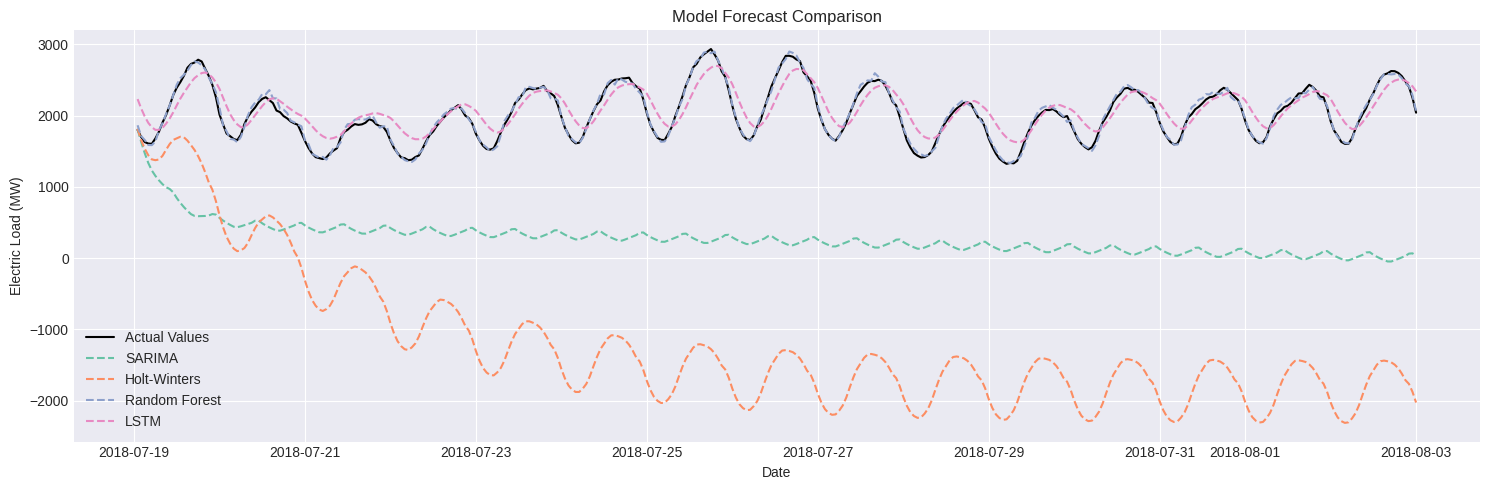

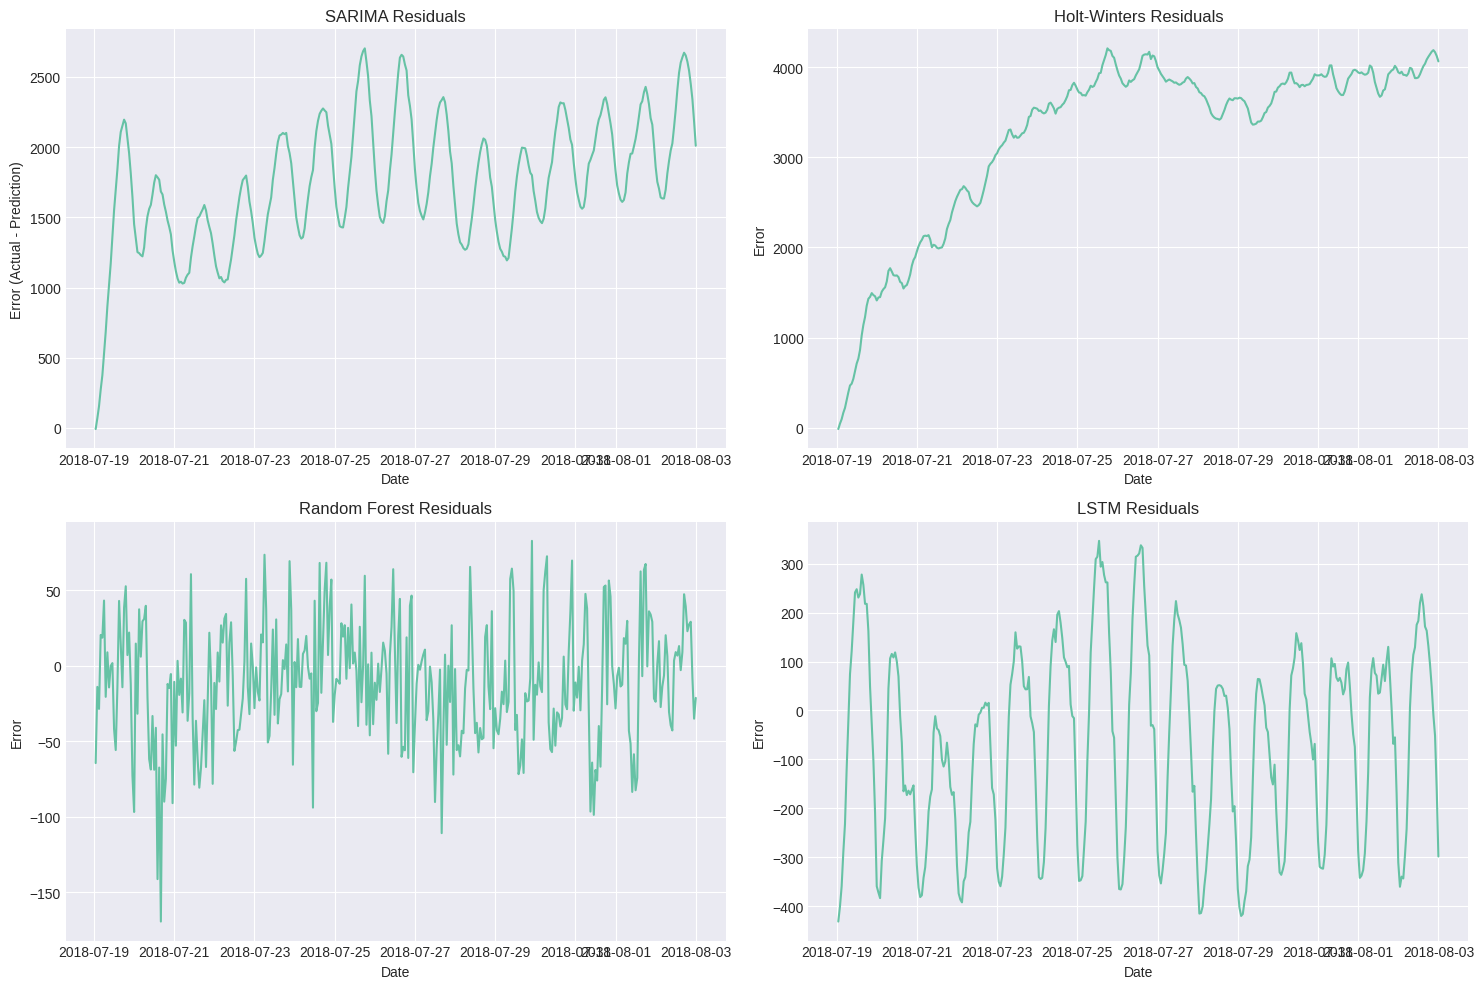

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# --- 1. Train-Test Split (Last 45 days - Last 15 days as test) ---
df = df.set_index('Datetime')
series = df['DAYTON_MW']
train = series.iloc[-24*45:-24*15]
test = series.iloc[-24*15:]

# --- 2. SARIMA ---
sarima_model = SARIMAX(train, order=(1,1,1), seasonal_order=(0,1,1,12),
                       enforce_stationarity=False, enforce_invertibility=False).fit(disp=False)
sarima_pred = sarima_model.predict(start=test.index[0], end=test.index[-1])
mape_sarima = mean_absolute_percentage_error(test, sarima_pred)

# --- 3. Holt-Winters ---
hw_model = ExponentialSmoothing(train, trend='add', seasonal='add',
                                seasonal_periods=24, damped_trend=True).fit()
hw_pred = hw_model.predict(start=test.index[0], end=test.index[-1])
mape_hw = mean_absolute_percentage_error(test, hw_pred)

# --- 4. Random Forest using final_vif
X_rf = df[final_vif['Feature'][final_vif['Feature'] != 'const']]
y_rf = df['DAYTON_MW']
X_train_rf = X_rf.iloc[-24*45:-24*15]
X_test_rf = X_rf.iloc[-24*15:]
y_train_rf = y_rf.iloc[-24*45:-24*15]
y_test_rf = y_rf.iloc[-24*15:]

rf_model = RandomForestRegressor(n_estimators=50, max_depth=10)
rf_model.fit(X_train_rf, y_train_rf)
rf_pred = rf_model.predict(X_test_rf)
mape_rf = mean_absolute_percentage_error(y_test_rf, rf_pred)

# --- 5. LSTM ---
lstm_data = df[['DAYTON_MW']].iloc[-24*45:]
scaler = MinMaxScaler()
lstm_scaled = scaler.fit_transform(lstm_data)

def create_lstm_dataset(data, lag=12):
    X, y = [], []
    for i in range(lag, len(data)):
        X.append(data[i-lag:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X_lstm, y_lstm = create_lstm_dataset(lstm_scaled)
X_lstm = X_lstm.reshape((X_lstm.shape[0], X_lstm.shape[1], 1))
split_point = len(X_lstm) - 24*15
X_train_lstm, X_test_lstm = X_lstm[:split_point], X_lstm[split_point:]
y_train_lstm, y_test_lstm = y_lstm[:split_point], y_lstm[split_point:]

model_lstm = Sequential()
model_lstm.add(LSTM(25, input_shape=(X_train_lstm.shape[1], 1)))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
model_lstm.fit(X_train_lstm, y_train_lstm, epochs=5, batch_size=32, verbose=0)

lstm_pred = model_lstm.predict(X_test_lstm)
lstm_pred_inv = scaler.inverse_transform(lstm_pred)
y_test_inv = scaler.inverse_transform(y_test_lstm.reshape(-1, 1))
mape_lstm = mean_absolute_percentage_error(y_test_inv, lstm_pred_inv)

# --- 6. MAPE Comparison ---
print("\n=== MAPE Comparison ===")
print(f"SARIMA MAPE:        {mape_sarima:.4f}")
print(f"Holt-Winters MAPE:  {mape_hw:.4f}")
print(f"Random Forest MAPE: {mape_rf:.4f}")
print(f"LSTM MAPE:          {mape_lstm:.4f}")

# --- 7. Forecast Plots ---
plt.figure(figsize=(15, 5))
plt.plot(test.index, test.values, label='Actual Values', color='black', linewidth=1.5)
plt.plot(test.index, sarima_pred, label='SARIMA', linestyle='--')
plt.plot(test.index, hw_pred, label='Holt-Winters', linestyle='--')
plt.plot(test.index, rf_pred, label='Random Forest', linestyle='--')
plt.plot(test.index, lstm_pred_inv, label='LSTM', linestyle='--')
plt.title("Model Forecast Comparison")
plt.xlabel("Date")
plt.ylabel("Electric Load (MW)")
plt.legend()
plt.tight_layout()
plt.show()

# --- 8. Residual (Error) Plots ---
plt.figure(figsize=(15, 10))

# SARIMA residuals
plt.subplot(2, 2, 1)
plt.plot(test.index, test.values - sarima_pred)
plt.title("SARIMA Residuals")
plt.xlabel("Date")
plt.ylabel("Error (Actual - Prediction)")

# Holt-Winters residuals
plt.subplot(2, 2, 2)
plt.plot(test.index, test.values - hw_pred)
plt.title("Holt-Winters Residuals")
plt.xlabel("Date")
plt.ylabel("Error")

# Random Forest residuals
plt.subplot(2, 2, 3)
plt.plot(test.index, y_test_rf.values - rf_pred)
plt.title("Random Forest Residuals")
plt.xlabel("Date")
plt.ylabel("Error")

# LSTM residuals
plt.subplot(2, 2, 4)
plt.plot(test.index, y_test_inv.flatten() - lstm_pred_inv.flatten())
plt.title("LSTM Residuals")
plt.xlabel("Date")
plt.ylabel("Error")

plt.tight_layout()
plt.show()


forecast

Checking performance of the current Random Forest model...
Original Random Forest MAPE: 0.0161 (1.61%)
Training the optimized Random Forest model...
Starting fast forecast...
Calculating features...
Making model predictions...
Adding realistic variations...
Fast forecast completed! 43800 hourly predictions generated.


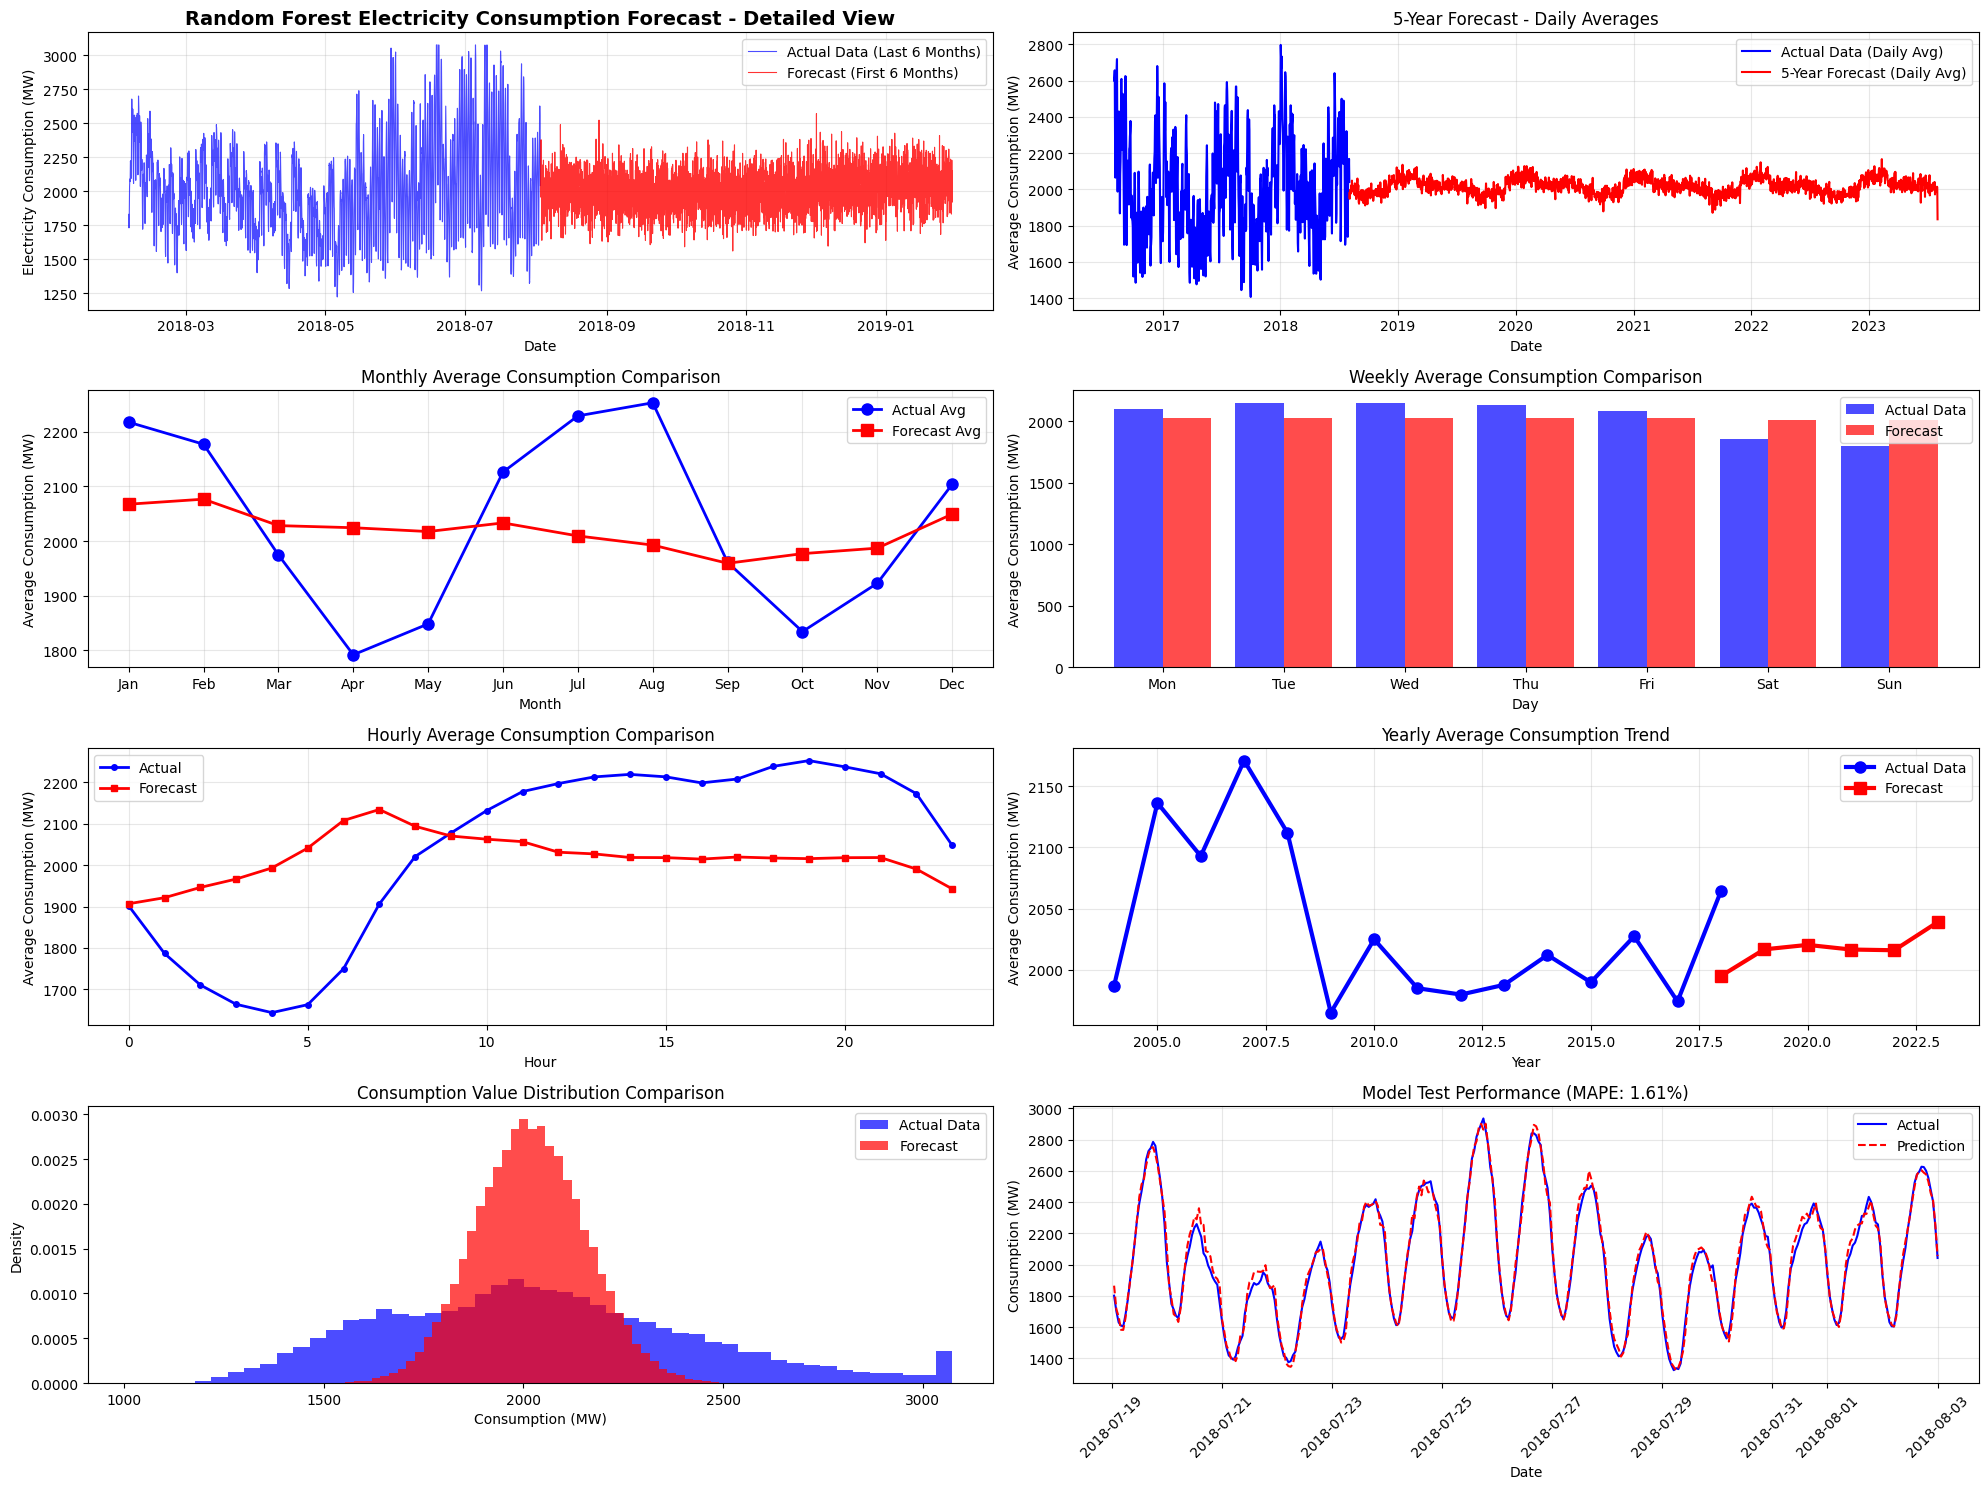


5-YEAR FORECAST QUICK ANALYSIS

Model Performance:
Random Forest MAPE: 0.0161 (1.61%)

Forecast Summary:
  Period: 2018-08-03 - 2023-08-02
  Total: 43,800 hours
  Average: 2018.19 MW
  Min-Max: 1488.76 - 2577.97 MW

Yearly Averages:
  2018: 1995.08 MW
  2019: 2016.84 MW
  2020: 2020.50 MW
  2021: 2016.71 MW
  2022: 2016.12 MW
  2023: 2039.00 MW

Saving files...
✓ Fast forecast successfully completed!


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Matplotlib settings for proper character rendering
plt.rcParams['font.family'] = ['DejaVu Sans']

# --- 1. Validate current Random Forest model's MAPE ---
print("Checking performance of the current Random Forest model...")

X_rf = df[final_vif['Feature'][final_vif['Feature'] != 'const']]
y_rf = df['DAYTON_MW']
X_train_rf = X_rf.iloc[-24*45:-24*15]
X_test_rf = X_rf.iloc[-24*15:]
y_train_rf = y_rf.iloc[-24*45:-24*15]
y_test_rf = y_rf.iloc[-24*15:]

rf_model_original = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42)
rf_model_original.fit(X_train_rf, y_train_rf)
rf_pred_original = rf_model_original.predict(X_test_rf)
mape_rf_original = mean_absolute_percentage_error(y_test_rf, rf_pred_original)

print(f"Original Random Forest MAPE: {mape_rf_original:.4f} ({mape_rf_original*100:.2f}%)")

# --- 2. Optimized Random Forest Model ---
print("Training the optimized Random Forest model...")

rf_model_full = RandomForestRegressor(
    n_estimators=100,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)

rf_model_full.fit(X_rf, y_rf)

# --- 3. VECTORIZED FAST FORECAST ---
def create_fast_realistic_forecast(df, model, feature_cols, periods=24*365*5):
    """
    Vectorized fast and realistic forecast
    """
    print("Starting fast forecast...")

    last_date = df.index[-1]
    future_dates = pd.date_range(start=last_date + timedelta(hours=1),
                                periods=periods, freq='H')

    hours = future_dates.hour.values
    days = future_dates.day.values
    months = future_dates.month.values
    years = future_dates.year.values
    dayofweeks = future_dates.dayofweek.values
    dayofyears = future_dates.dayofyear.values

    n_features = len(feature_cols)
    X_future = np.zeros((periods, n_features))

    recent_data_length = min(len(df), 24*7)
    last_values = df[feature_cols].iloc[-recent_data_length:].mean().values

    print("Calculating features...")

    for i, col in enumerate(feature_cols):
        if 'hour' in col.lower() and 'sin' in col.lower():
            X_future[:, i] = np.sin(2 * np.pi * hours / 24)
        elif 'hour' in col.lower() and 'cos' in col.lower():
            X_future[:, i] = np.cos(2 * np.pi * hours / 24)
        elif 'month' in col.lower() and 'sin' in col.lower():
            X_future[:, i] = np.sin(2 * np.pi * months / 12)
        elif 'month' in col.lower() and 'cos' in col.lower():
            X_future[:, i] = np.cos(2 * np.pi * months / 12)
        elif 'day' in col.lower() and 'sin' in col.lower() and 'week' in col.lower():
            X_future[:, i] = np.sin(2 * np.pi * dayofweeks / 7)
        elif 'day' in col.lower() and 'cos' in col.lower() and 'week' in col.lower():
            X_future[:, i] = np.cos(2 * np.pi * dayofweeks / 7)
        elif col.lower() in ['hour']:
            X_future[:, i] = hours
        elif col.lower() in ['month']:
            X_future[:, i] = months
        elif col.lower() in ['dayofweek']:
            X_future[:, i] = dayofweeks
        elif col.lower() in ['year']:
            yearly_avg_hist = df.groupby(df.index.year)['DAYTON_MW'].mean()
            if len(yearly_avg_hist) > 1:
                last_year = yearly_avg_hist.index[-1]
                second_last_year = yearly_avg_hist.index[-2]
                slope = (yearly_avg_hist.iloc[-1] - yearly_avg_hist.iloc[-2]) / (last_year - second_last_year)
                intercept = yearly_avg_hist.iloc[-1] - slope * last_year
                X_future[:, i] = intercept + slope * years
            else:
                X_future[:, i] = yearly_avg_hist.iloc[-1] if len(yearly_avg_hist) > 0 else df['DAYTON_MW'].mean()
        elif col.lower() == 'is_weekend':
            X_future[:, i] = np.isin(dayofweeks, [5, 6]).astype(int)
        else:
            X_future[:, i] = last_values[i]

    print("Making model predictions...")

    base_predictions = model.predict(X_future)

    print("Adding realistic variations...")

    df_grouped = df.copy()
    if not isinstance(df_grouped.index, pd.DatetimeIndex):
        df_grouped = df_grouped.set_index('Datetime')

    hourly_std = df_grouped.groupby(df_grouped.index.hour)['DAYTON_MW'].std().reindex(range(24)).fillna(0)
    daily_std = df_grouped.groupby(df_grouped.index.dayofweek)['DAYTON_MW'].std().reindex(range(7)).fillna(0)
    monthly_std = df_grouped.groupby(df_grouped.index.month)['DAYTON_MW'].std().reindex(range(1, 13)).fillna(0)

    np.random.seed(42)

    hourly_noise = np.random.normal(0, hourly_std.values[hours % 24] * 0.3)
    daily_noise = np.random.normal(0, daily_std.values[dayofweeks % 7] * 0.2)

    monthly_std_indices = np.where(months % 12 == 0, 12, months % 12)
    monthly_std_values_mapped = monthly_std.loc[monthly_std_indices].values

    monthly_trend = np.sin(2 * np.pi * months / 12) * monthly_std_values_mapped * 0.1

    seasonal_effect = np.where(np.isin(months, [12, 1, 2]), 50,
                              np.where(np.isin(months, [6, 7, 8]), 30, 0))

    final_predictions = base_predictions + hourly_noise + daily_noise + monthly_trend + seasonal_effect

    min_val = df['DAYTON_MW'].min() * 0.8
    max_val = df['DAYTON_MW'].max() * 1.2
    final_predictions = np.clip(final_predictions, min_val, max_val)

    return final_predictions, future_dates

# --- 4. Fast Forecast Generation ---
future_predictions, future_dates = create_fast_realistic_forecast(df, rf_model_full, X_rf.columns)

forecast_df = pd.DataFrame({
    'Datetime': future_dates,
    'Forecast_MW': future_predictions
})
forecast_df.set_index('Datetime', inplace=True)

print(f"Fast forecast completed! {len(future_predictions)} hourly predictions generated.")

# --- 5. Optimized Visualization ---
plt.style.use('default')
fig = plt.figure(figsize=(20, 15))

def downsample_for_plotting(data, max_points=5000):
    """Sample if too many points for plotting"""
    if len(data) > max_points:
        step = len(data) // max_points
        return data.iloc[::step]
    return data

# 1. Main Forecast View
plt.subplot(4, 2, 1)
historical_period = downsample_for_plotting(df.iloc[-24*180:])
first_6months = downsample_for_plotting(forecast_df.iloc[:24*180])

plt.plot(historical_period.index, historical_period['DAYTON_MW'],
         label='Actual Data (Last 6 Months)', color='blue', linewidth=0.8, alpha=0.7)
plt.plot(first_6months.index, first_6months['Forecast_MW'],
         label='Forecast (First 6 Months)', color='red', linewidth=0.8, alpha=0.8)

plt.title('Random Forest Electricity Consumption Forecast - Detailed View', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Electricity Consumption (MW)')
plt.legend()
plt.grid(True, alpha=0.3)

# 2. Daily Average View
plt.subplot(4, 2, 2)
historical_daily = df.iloc[-24*730:].resample('D').mean()
forecast_daily = forecast_df.resample('D').mean()

plt.plot(historical_daily.index, historical_daily['DAYTON_MW'],
         label='Actual Data (Daily Avg)', color='blue', linewidth=1.5)
plt.plot(forecast_daily.index, forecast_daily['Forecast_MW'],
         label='5-Year Forecast (Daily Avg)', color='red', linewidth=1.5)

plt.title('5-Year Forecast - Daily Averages')
plt.xlabel('Date')
plt.ylabel('Average Consumption (MW)')
plt.legend()
plt.grid(True, alpha=0.3)

# 3. Monthly Comparison
plt.subplot(4, 2, 3)
monthly_historical = df.groupby(df.index.month)['DAYTON_MW'].mean()
monthly_forecast = forecast_df.groupby(forecast_df.index.month)['Forecast_MW'].mean()

months_plot = range(1, 13)
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.plot(months_plot, monthly_historical.values, 'o-', label='Actual Avg',
         linewidth=2, markersize=8, color='blue')
plt.plot(months_plot, monthly_forecast.values, 's-', label='Forecast Avg',
         linewidth=2, markersize=8, color='red')
plt.title('Monthly Average Consumption Comparison')
plt.xlabel('Month')
plt.ylabel('Average Consumption (MW)')
plt.xticks(months_plot, month_names)
plt.legend()
plt.grid(True, alpha=0.3)

# 4. Weekly Pattern
plt.subplot(4, 2, 4)
weekday_historical = df.groupby(df.index.dayofweek)['DAYTON_MW'].mean()
weekday_forecast = forecast_df.groupby(forecast_df.index.dayofweek)['Forecast_MW'].mean()

days_plot = range(7)
day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

plt.bar([d-0.2 for d in days_plot], weekday_historical.values, width=0.4,
        label='Actual Data', alpha=0.7, color='blue')
plt.bar([d+0.2 for d in days_plot], weekday_forecast.values, width=0.4,
        label='Forecast', alpha=0.7, color='red')
plt.title('Weekly Average Consumption Comparison')
plt.xlabel('Day')
plt.ylabel('Average Consumption (MW)')
plt.xticks(days_plot, day_names)
plt.legend()

# 5. Hourly Pattern
plt.subplot(4, 2, 5)
hourly_historical = df.groupby(df.index.hour)['DAYTON_MW'].mean()
hourly_forecast = forecast_df.groupby(forecast_df.index.hour)['Forecast_MW'].mean()

hours_plot = range(24)
plt.plot(hours_plot, hourly_historical.values, 'o-', label='Actual',
         linewidth=2, markersize=4, color='blue')
plt.plot(hours_plot, hourly_forecast.values, 's-', label='Forecast',
         linewidth=2, markersize=4, color='red')
plt.title('Hourly Average Consumption Comparison')
plt.xlabel('Hour')
plt.ylabel('Average Consumption (MW)')
plt.legend()
plt.grid(True, alpha=0.3)

# 6. Yearly Trend
plt.subplot(4, 2, 6)
yearly_historical = df.groupby(df.index.year)['DAYTON_MW'].mean()
yearly_forecast = forecast_df.groupby(forecast_df.index.year)['Forecast_MW'].mean()

plt.plot(yearly_historical.index, yearly_historical.values, 'o-',
         label='Actual Data', linewidth=3, markersize=8, color='blue')
plt.plot(yearly_forecast.index, yearly_forecast.values, 's-',
         label='Forecast', linewidth=3, markersize=8, color='red')
plt.title('Yearly Average Consumption Trend')
plt.xlabel('Year')
plt.ylabel('Average Consumption (MW)')
plt.legend()
plt.grid(True, alpha=0.3)

# 7. Fast Histogram (sampled)
plt.subplot(4, 2, 7)
hist_sample_size = min(50000, len(df))
forecast_sample_size = min(50000, len(forecast_df))

df_sample = df['DAYTON_MW'].sample(hist_sample_size, random_state=42)
forecast_sample = forecast_df['Forecast_MW'].sample(forecast_sample_size, random_state=42)

plt.hist(df_sample.values, bins=50, alpha=0.7, label='Actual Data',
         color='blue', density=True)
plt.hist(forecast_sample.values, bins=50, alpha=0.7, label='Forecast',
         color='red', density=True)
plt.title('Consumption Value Distribution Comparison')
plt.xlabel('Consumption (MW)')
plt.ylabel('Density')
plt.legend()

# 8. Model Test Performance
plt.subplot(4, 2, 8)
test_sample = downsample_for_plotting(pd.DataFrame({'actual': y_test_rf.values, 'pred': rf_pred_original},
                                                  index=y_test_rf.index))
plt.plot(test_sample.index, test_sample['actual'], label='Actual',
         linewidth=1.5, color='blue')
plt.plot(test_sample.index, test_sample['pred'], label='Prediction',
         linewidth=1.5, color='red', linestyle='--')
plt.title(f'Model Test Performance (MAPE: {mape_rf_original*100:.2f}%)')
plt.xlabel('Date')
plt.ylabel('Consumption (MW)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# --- 6. Quick Statistical Summary ---
print("\n" + "="*80)
print("5-YEAR FORECAST QUICK ANALYSIS")
print("="*80)

print(f"\nModel Performance:")
print(f"Random Forest MAPE: {mape_rf_original:.4f} ({mape_rf_original*100:.2f}%)")

print(f"\nForecast Summary:")
print(f"  Period: {forecast_df.index[0].strftime('%Y-%m-%d')} - {forecast_df.index[-1].strftime('%Y-%m-%d')}")
print(f"  Total: {len(forecast_df):,} hours")
print(f"  Average: {forecast_df['Forecast_MW'].mean():.2f} MW")
print(f"  Min-Max: {forecast_df['Forecast_MW'].min():.2f} - {forecast_df['Forecast_MW'].max():.2f} MW")

print(f"\nYearly Averages:")
yearly_fore = forecast_df.groupby(forecast_df.index.year)['Forecast_MW'].mean()
for year, avg in yearly_fore.items():
    print(f"  {year}: {avg:.2f} MW")

print(f"\nSaving files...")
forecast_df.to_csv('fast_forecast_results.csv')
forecast_df.resample('D').mean().to_csv('fast_daily_forecast.csv')
forecast_df.resample('M').mean().to_csv('fast_monthly_forecast.csv')

print(f"✓ Fast forecast successfully completed!")
